<a href="https://colab.research.google.com/github/ashwinsathish/Hyp-embeddings/blob/main/poincare_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Poincaré Embeddings

In [ ]:
pip install jupyterthemes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.0 MB 5.5 MB/s 
     |████████████████████████████████| 9.9 MB 40.6 MB/s 
     |████████████████████████████████| 46 kB 1.9 MB/s 
     |████████████████████████████████| 49 kB 5.9 MB/s 
     |████████████████████████████████| 428 kB 60.4 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Attempting uninstall: notebook
    Found existing installation: notebook 5.3.1
    Uninstalling notebook-5.3.1:
      Successfully uninstalled notebook-5.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires notebook~=5.3.0; python_version >= "3.0", but you have notebook 6.4.12 which is incompatible.
goo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.utils import check_random_state
plt.style.use('classic')
plt.rcParams['figure.figsize'] = (6.5, 6.5)
plt.rcParams['figure.facecolor'] = 'white'
from jupyterthemes import jtplot
jtplot.style()

# ignore warnings
import warnings
warnings.filterwarnings('ignore');

# display multiple outputs within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all";

## Implementing the  Poincaré Model

In [ ]:
def norm(x, axis=None):
    return np.linalg.norm(x, axis=axis)

def poincare_dist(u, v, eps=1e-5):
    d = 1 + 2 * norm(u-v)**2 / ((1 - norm(u)**2) * (1 - norm(v)**2) + eps)
    return np.arccosh(d)

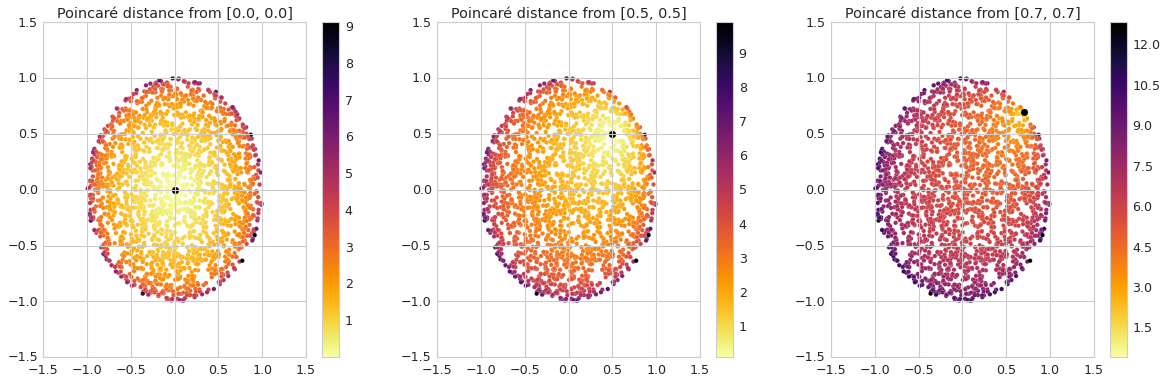

In [ ]:
# plot unit circle in R^2
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(1, 3, 1)

# sample within unit circle in R^2
n = 2000
theta = np.random.uniform(0, 2*np.pi, n)
u = np.random.uniform(0, 1, n)
r = np.sqrt(u)
X = np.array([r * np.cos(theta), r * np.sin(theta)]).T
i = np.random.choice(n)

xi = [0.0, 0.0]
dist_xi = [poincare_dist(xi, x) for x in X]
im = ax.scatter(X[:,0], X[:,1], s=20, c=dist_xi, cmap='inferno_r', edgecolors='white')
ax.scatter(xi, xi, s =50, c='black')
ax.set_title('Poincaré distance from ' + str(xi))
plt.colorbar(im)

ax = fig.add_subplot(1, 3, 2)
xi = [0.5, 0.5]
dist_xi = [poincare_dist(xi, x) for x in X]
im = ax.scatter(X[:,0], X[:,1], s=20, c=dist_xi, cmap='inferno_r', edgecolors='white')
ax.scatter(xi, xi, s =50, c='black')
ax.set_title('Poincaré distance from ' + str(xi))
plt.colorbar(im);

ax = fig.add_subplot(1, 3, 3)
xi = [0.7, 0.7]
dist_xi = [poincare_dist(xi, x) for x in X]
im = ax.scatter(X[:,0], X[:,1], s=20, c=dist_xi, cmap='inferno_r', edgecolors='white')
ax.scatter(xi, xi, s =50, c='black')
ax.set_title('Poincaré distance from ' + str(xi))
plt.colorbar(im)
plt.show();

## WORDNET Hierarchies/Taxonomy

### Mammals Dataset
Now we generate a set of data with hypernymy relations for words in the 'mammals' subtree/taxonomy from the nltk library.

In [ ]:
import re
import pandas
from nltk.corpus import wordnet as wn
from tqdm import tqdm
try:
    wn.all_synsets
except LookupError as e:
    import nltk
    nltk.download('wordnet')

# make sure each edge is included only once
edges = set()
for synset in tqdm(wn.all_synsets(pos='n')):
    # write the transitive closure of all hypernyms of a synset to file
    for hyper in synset.closure(lambda s: s.hypernyms()):
        edges.add((synset.name(), hyper.name()))

    # also write transitive closure for all instances of a synset
    for instance in synset.instance_hyponyms():
        for hyper in instance.closure(lambda s: s.instance_hypernyms()):
            edges.add((instance.name(), hyper.name()))
            for h in hyper.closure(lambda s: s.hypernyms()):
                edges.add((instance.name(), h.name()))

nouns = pandas.DataFrame(list(edges), columns=['id1', 'id2'])
nouns['weight'] = 1

# Extract the set of nouns that have "mammal.n.01" as a hypernym
mammal_set = set(nouns[nouns.id2 == 'mammal.n.01'].id1.unique())
mammal_set.add('mammal.n.01')

# Select relations that have a mammal as hypo and hypernym
mammals = nouns[nouns.id1.isin(mammal_set) & nouns.id2.isin(mammal_set)]

with open('mammals_filter.txt', 'r') as fin:
    filt = re.compile(f'({"|".join([l.strip() for l in fin.readlines()])})')


filtered_mammals = mammals[~mammals.id1.str.cat(' ' + mammals.id2).str.match(filt)]

nouns.to_csv('noun_closure.csv', index=False)
filtered_mammals.to_csv('mammal_closure.csv', index=False)

<bound method WordNetCorpusReader.all_synsets of <WordNetCorpusReader in '/root/nltk_data/corpora/wordnet'>>

82115it [00:06, 13398.99it/s]


In [ ]:
import csv
# path = "data/wordnet_mammal_hypernyms.tsv"
path = "data/mammals_sample.tsv"
def load_data(file_path, delim="\t"):
    data = []
    with open(path, "r") as f:
        reader = csv.reader(f, delimiter=delim)
        for i, line in enumerate(reader):
            data.append(line)
    return data
mammal_relations = load_data(path)
mammal_relations[:5]

FileNotFoundError: ignored

In [ ]:
mammal = pd.read_csv('data/mammal_closure.csv')
print('Total unique nodes: ', len(np.unique(list(mammal.id1.values) + list(mammal.id2.values))))
mammal_relations = [[mammal.id1[i].split('.')[0], mammal.id2[i].split('.')[0]] for i in range(len(mammal))]
#mammal_relations = [[mammal.id1[i], mammal.id2[i]] for i in range(len(mammal))]
print('Total relations: ', len(mammal_relations))
print('# of (u, u) type relations: ', len([r for r in mammal_relations if r[0]==r[1]]))
print('First ten relations:\n', mammal_relations[:10])

FileNotFoundError: ignored

In [ ]:
unique_nodes = np.unique([item for sublist in mammal_relations for item in sublist])
def init_embeddings(n, dim, low=-0.001, high=0.001):
    theta_init = np.random.uniform(low, high, size=(n, dim))
    return theta_init
emb = init_embeddings(len(unique_nodes), 2)
emb_dict = dict(zip(unique_nodes, emb))
{k: emb_dict[k] for k in list(emb_dict)[:10]}

{'antelope.n.01': array([1.67270195e-04, 8.95262370e-05]),
 'beagle.n.01': array([-0.00020277, -0.00026251]),
 'bison.n.01': array([ 0.00067485, -0.00059978]),
 'border_collie.n.01': array([-4.64645933e-04, -7.03702375e-05]),
 'canine.n.02': array([-2.00708254e-05,  2.13433140e-04]),
 'carnivore.n.01': array([0.00059443, 0.00061839]),
 'cat.n.01': array([0.00039714, 0.0006847 ]),
 'collie.n.01': array([ 0.00075454, -0.00072474]),
 'dog.n.01': array([-0.00051938,  0.00079434]),
 'domestic_cat.n.01': array([-0.00083   ,  0.00063685])}

In [ ]:
def negative_sample(data, u, n_samples):
    positives = [x[1] for x in data if x[0] == u]
    negatives = np.array([x for x in unique_nodes if x not in positives])
    #negatives = np.array([x[1] for x in data if x[1] not in positives])
    random_ix = np.random.permutation(len(negatives))[:n_samples]
    neg_samples = [[u, x] for x in negatives[random_ix]]
    neg_samples.append([u,u])
    return neg_samples
negative_sample(mammal_relations, 'kangaroo', 4)

eps = 1e-5
def partial_d(theta, x):
    alpha = 1 - norm(theta)**2
    beta = 1 - norm(x)**2
    gamma = 1 + 2/(alpha*beta + eps) * norm(theta-x)**2
    lhs = 4 / (beta*np.sqrt(gamma**2 - 1) + eps)
    rhs = 1/(alpha**2 + eps) * (norm(x)**2 - 2*np.inner(theta,x) + 1) * theta - x/(alpha + eps)
    return lhs*rhs

def proj(theta):
    if norm(theta) >= 1:
        theta = theta/norm(theta) - eps
    return theta

def update(u, lr, grad, embeddings, test=False):
    theta = embeddings[u]
    step = 1/4 * lr*(1 - norm(theta)**2)**2 * grad
    embeddings[u] = proj(theta - step)
    if test:
        if norm(proj(theta - step) < norm(theta)):
            print('updating '+u+' closer to origin')
        else:
            print('updating ' +u+ ' away from origin')
    return

import time
num_neg = 10
def train_poincare(relations, lr=0.01, num_epochs=10):
    for i in range(num_epochs):
        #loss=0
        start = time.time()
        for relation in relations:
            u, v = relation[0], relation[1]
            if u == v:
                continue
            # embedding vectors (theta, x) for relation (u, v)
            theta, x = emb_dict[u], emb_dict[v]
            # embedding vectors v' in sample negative relations (u, v')
            neg_relations = [x[1] for x in negative_sample(relations, u, num_neg)]
            neg_embed = np.array([emb_dict[x] for x in neg_relations])
            # find partial derivatives of poincare distance
            dd_theta = partial_d(theta, x) 
            dd_x = partial_d(x, theta)
            # find partial derivatives of loss function
            dloss_theta = -1
            dloss_x = 1
            grad_theta = dloss_theta * dd_theta
            grad_x = dloss_x * dd_x
            update(u, lr, grad_theta, emb_dict)
            update(v, lr, grad_x, emb_dict)
            # find gradients for negative samples
            neg_exp_dist = np.array([np.exp(-poincare_dist(theta, v_prime)) for v_prime in neg_embed])
            Z = neg_exp_dist.sum(axis=0)
            for vprime in neg_relations:
                dd_vprime = partial_d(emb_dict[vprime], theta)
                dd_u = partial_d(theta, emb_dict[vprime])
                dloss_vprime = -np.exp(-poincare_dist(emb_dict[vprime], theta)) / Z
                dloss_u = -np.exp(-poincare_dist(theta, emb_dict[vprime])) / Z
                grad_vprime = dd_vprime * dloss_vprime
                grad_u = dd_u * dloss_u
                update(vprime, lr, grad_vprime, emb_dict)
                update(u, lr, grad_u, emb_dict)
            #loss = loss + np.log(np.exp(-poincare_dist(theta, x))) / Z
        
        print('COMPLETED EPOCH ', i+1)
        #print(' LOSS: ', loss)
        print('---------- total seconds: ', time.time() - start)

NameError: name 'mammal_relations' is not defined

In [ ]:
train_poincare(mammal_relations, lr=0.01, num_epochs=30)

COMPLETED EPOCH  1
---------- total seconds:  0.1605684757232666
COMPLETED EPOCH  2
---------- total seconds:  0.1515953540802002
COMPLETED EPOCH  3
---------- total seconds:  0.15957212448120117
COMPLETED EPOCH  4
---------- total seconds:  0.1515951156616211
COMPLETED EPOCH  5
---------- total seconds:  0.15163183212280273
COMPLETED EPOCH  6
---------- total seconds:  0.1425797939300537
COMPLETED EPOCH  7
---------- total seconds:  0.15159368515014648
COMPLETED EPOCH  8
---------- total seconds:  0.14760589599609375
COMPLETED EPOCH  9
---------- total seconds:  0.15359044075012207
COMPLETED EPOCH  10
---------- total seconds:  0.1466064453125
COMPLETED EPOCH  11
---------- total seconds:  0.15059804916381836
COMPLETED EPOCH  12
---------- total seconds:  0.14959979057312012
COMPLETED EPOCH  13
---------- total seconds:  0.18051743507385254
COMPLETED EPOCH  14
---------- total seconds:  0.21442461013793945
COMPLETED EPOCH  15
---------- total seconds:  0.16456174850463867
COMPLETED EP

In [ ]:
def positive_ranks(item, relations, embedding_dict):
    theta = embedding_dict[item]
    distances = [poincare_dist(theta, x) for x in np.array(list(embedding_dict.values()))]
    positives = [x[1] for x in relations if x[0] == item]
    keys = list(embedding_dict.keys())
    ranks = [keys[i] for i in np.argsort(distances)]
    pos_ranks = [j for j in range(len(ranks)) if ranks[j] in positives]
    return pos_ranks
#positive_ranks('antelope.n.01', mammal_relations, emb_dict)

# positive ranks = [a, b, c, d] -> avg precision = avg(1/a + 2/b + 3/c + 4/d)
def avg_precision(item, relations, embedding_dict):
    ranks = positive_ranks(item, relations, embedding_dict)
    map_ranks = np.sort(ranks) + np.arange(len(ranks))
    avg_precision = ((np.arange(1, len(map_ranks) + 1) / np.sort(map_ranks)).mean())
    return avg_precision

def mean_average_precision(relations, embedding_dict):
    avg_precisions = []
    ranks = []
    for item in list(embedding_dict.keys()):
        if not np.isnan(avg_precision(item, relations, embedding_dict)):
            avg_precisions.append(avg_precision(item, relations, embedding_dict))
        if len(positive_ranks(item, relations, embedding_dict)) != 0:
            ranks = ranks+positive_ranks(item, relations, embedding_dict)
    return [ranks, avg_precisions]

def dist_squared(x, y, axis=None):
    return np.sum((x - y)**2, axis=axis)

def get_subtree(relations, embedding_dict, root_node):
    root_emb = embedding_dict[root_node]
    child_nodes = [x[0] for x in relations if x[1] == root_node]
    child_emb = np.array([embedding_dict[x[0]] for x in relations if x[1] == root_node])
    return [child_nodes, child_emb]
#get_subtree(mammal_relations, emb_dict, 'feline')
#for child in get_subtree(mammal_relations, embedding_dict, 'feline.n.01'):
#    ax.plot([embedding_dict['feline.n.01'][0], child[0]], [embedding_dict['feline.n.01'][1], child[1]], '--', c='black')

In [ ]:
def plot_embedding(embedding_dict, label_frac=0.001, plot_frac=0.6, title=None, save_fig=False):
    fig = plt.figure(figsize=(8,8))
    plt.grid('off')
    plt.xlim([-1.0,1.0])
    plt.ylim([-1.0,1.0])
    plt.axis('off')
    ax = plt.gca()
    embed_vals = np.array(list(embedding_dict.values()))
    #plt.xlim([embed_vals.min(0)[0],embed_vals.max(0)[0]])
    #plt.ylim([embed_vals.min(0)[1],embed_vals.max(0)[1]])
    keys = list(embedding_dict.keys())
    min_dist_2 = label_frac * max(embed_vals.max(axis=0) - embed_vals.min(axis=0)) ** 2
    labeled_vals = np.array([2*embed_vals.max(axis=0)])
    groups = [keys[i] for i in np.argsort(np.linalg.norm(embed_vals, axis=1))][:10]
    #groups.insert(0, 'mammal.n.01')
    for key in groups:
        if np.min(dist_squared(embedding_dict[key], labeled_vals, axis=1)) < min_dist_2:
            continue
        else:
            _ = ax.scatter(embedding_dict[key][0], embedding_dict[key][1], s=40)
            props = dict(boxstyle='round', lw=2, edgecolor='black', alpha=0.5)
            _ = ax.text(embedding_dict[key][0], embedding_dict[key][1]+0.01, s=key.split('.')[0], 
                        size=8, fontsize=10, verticalalignment='top', bbox=props)
            labeled_vals = np.vstack((labeled_vals, embedding_dict[key]))
    n = int(plot_frac*len(embed_vals))
    for i in np.random.permutation(len(embed_vals))[:n]:
        _ = ax.scatter(embed_vals[i][0], embed_vals[i][1],  s=40)
        if np.min(dist_squared(embed_vals[i], labeled_vals, axis=1)) < min_dist_2:
            continue
        else:
            _ = ax.text(embed_vals[i][0], embed_vals[i][1]+0.02, s=keys[i].split('.')[0], 
                        size=6, fontsize=8, verticalalignment='top', bbox=props)
            labeled_vals = np.vstack((labeled_vals, embed_vals[i]))
    if title != None:
        plt.title(title, size=20)
    if save_fig:
        plt.savefig('images/poincare_mammals_sample.png')
    print(labeled_vals.shape)

In [ ]:
emb_ranks, emb_precisions = mean_average_precision(mammal_relations, emb_dict)
print('MEAN RANK: ', np.mean(emb_ranks))
print('MAP SCORE: ', np.mean(np.nan_to_num(emb_precisions)))

MEAN RANK:  4.796610169491525
MAP SCORE:  0.4997917115564174


(25, 2)


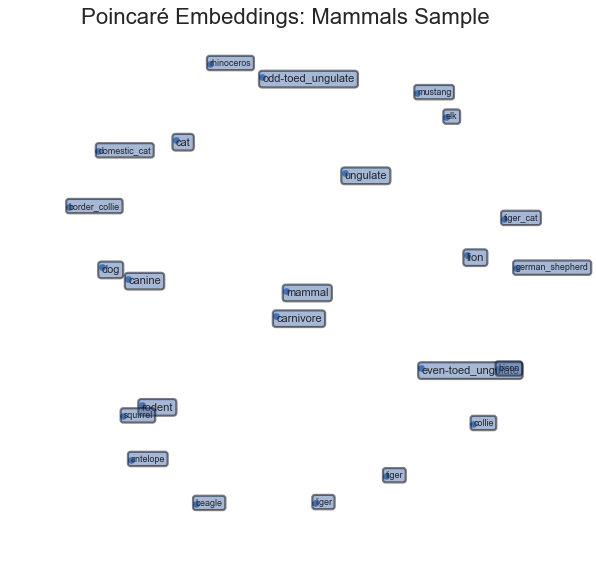

In [ ]:
plot_embedding(emb_dict, plot_frac=1, label_frac=0.001,
               title='Poincaré Embeddings: Mammals Sample', save_fig=True)

## Testing other WORDNET taxonomies

## 'Knowledge domain' subtree

In [ ]:
nouns = pd.read_csv('data/noun_closure.csv')
# Extract the set of nouns that have "knowledge_domain.n.01" as a hypernym
knowledge_set = set(nouns[nouns.id2 == 'knowledge_domain.n.01'].id1.unique())
knowledge_set.add('knowledge_domain.n.01')

# Select relations that have a knowledge_domain as hypo and hypernym
knowledge = nouns[nouns.id1.isin(knowledge_set) & nouns.id2.isin(knowledge_set)]
len(knowledge)
knowledge.head()
#with open('knowledge_filter.txt', 'r') as fin:
#    filt = re.compile(f'({"|".join([l.strip() for l in fin.readlines()])})')
#filtered_knowledge = knowledge[~knowledge.id1.str.cat(' ' + knowledge.id2).str.match(filt)]
knowledge.to_csv('data/knowledge_closure.csv', index=False)

4078

,id1,id2,weight
100,solid_geometry.n.01,science.n.01,1
382,business.n.09,performing_arts.n.01,1
1032,psychopharmacology.n.01,discipline.n.01,1
1064,fractal_geometry.n.01,discipline.n.01,1
1074,geography.n.01,natural_science.n.01,1


In [ ]:
knowledge = pd.read_csv('data/knowledge_closure.csv')
print('Total unique nodes: ', len(np.unique(list(knowledge.id1.values) + list(knowledge.id2.values))))
knowledge_relations = [[knowledge.id1[i].split('.')[0], knowledge.id2[i].split('.')[0]] for i in range(len(knowledge))]
#knowledge_relations = [[knowledge.id1[i], knowledge.id2[i]] for i in range(len(knowledge))]
print('Total relations: ', len(knowledge_relations))
print('# of (u, u) type relations: ', len([r for r in knowledge_relations if r[0]==r[1]]))
print('First ten relations:\n', knowledge_relations[:10])

Total unique nodes:  719
Total relations:  4078
# of (u, u) type relations:  0
First ten relations:
 [['solid_geometry', 'science'], ['business', 'performing_arts'], ['psychopharmacology', 'discipline'], ['fractal_geometry', 'discipline'], ['geography', 'natural_science'], ['jam_session', 'musical_performance'], ['protozoology', 'life_science'], ['animatronics', 'robotics'], ['parody', 'humanistic_discipline'], ['petrology', 'knowledge_domain']]


In [ ]:
unique_nodes = np.unique([item for sublist in knowledge_relations for item in sublist])
def init_embeddings(n, dim, low=-0.001, high=0.001):
    theta_init = np.random.uniform(low, high, size=(n, dim))
    return theta_init
emb = init_embeddings(len(unique_nodes), 2)
emb_dict = dict(zip(unique_nodes, emb))
{k: emb_dict[k] for k in list(emb_dict)[:10]}

{'a_cappella_singing': array([-9.20126865e-04,  7.71639973e-05]),
 'abnormal_psychology': array([-0.0008119 , -0.00074909]),
 'acoustics': array([-0.00018201, -0.00011669]),
 'acting': array([-2.67836584e-05, -2.92075748e-04]),
 'adagio': array([-0.00076766, -0.00062681]),
 'aerology': array([0.00056919, 0.00097091]),
 'aeromechanics': array([-0.00085292, -0.00033734]),
 'aeromedicine': array([ 0.00067472, -0.00033774]),
 'aeronautical_engineering': array([0.00014259, 0.0004888 ]),
 'aeronautics': array([-0.00055153, -0.00086172])}

In [ ]:
train_poincare(knowledge_relations, lr=0.01, num_epochs=20)

COMPLETED EPOCH  1
---------- total seconds:  13.424127101898193
COMPLETED EPOCH  2
---------- total seconds:  13.31434965133667
COMPLETED EPOCH  3
---------- total seconds:  13.358304023742676
COMPLETED EPOCH  4
---------- total seconds:  12.821701526641846
COMPLETED EPOCH  5
---------- total seconds:  13.015148401260376
COMPLETED EPOCH  6
---------- total seconds:  13.103437662124634
COMPLETED EPOCH  7
---------- total seconds:  13.408133745193481
COMPLETED EPOCH  8
---------- total seconds:  13.09397578239441
COMPLETED EPOCH  9
---------- total seconds:  12.956473588943481
COMPLETED EPOCH  10
---------- total seconds:  12.797802448272705
COMPLETED EPOCH  11
---------- total seconds:  12.909722566604614
COMPLETED EPOCH  12
---------- total seconds:  13.027230978012085
COMPLETED EPOCH  13
---------- total seconds:  13.514814853668213
COMPLETED EPOCH  14
---------- total seconds:  16.257548809051514
COMPLETED EPOCH  15
---------- total seconds:  14.741578102111816
COMPLETED EPOCH  16
-

In [ ]:
embed_keys = list(emb_dict.keys())
embed_vals = np.array(list(emb_dict.values()))
groups = [embed_keys[i] for i in np.argsort(np.linalg.norm(embed_vals, axis=1))][:10]
groups

['knowledge_domain',
 'discipline',
 'humanistic_discipline',
 'science',
 'performing_arts',
 'natural_science',
 'dancing',
 'medical_science',
 'medicine',
 'life_science']

In [ ]:
emb_ranks, emb_precisions = mean_average_precision(knowledge_relations, emb_dict)
print('MEAN RANK: ', np.mean(emb_ranks))
print('MAP SCORE: ', np.mean(np.nan_to_num(emb_precisions)))

MEAN RANK:  119.60059686645113
MAP SCORE:  0.04170625141816214


(66, 2)


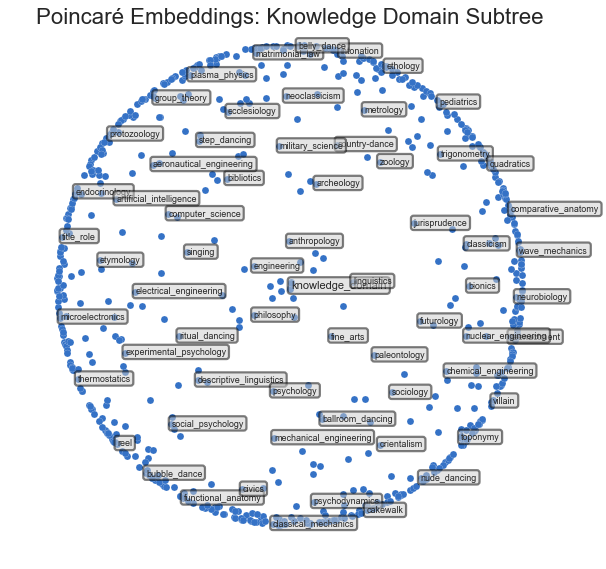

In [ ]:
plot_embedding(emb_dict, plot_frac=1, label_frac=0.007,
               title='Poincaré Embeddings: Knowledge Domain Subtree', save_fig=True)

## Smaller set with 'mathematics' and 'science' subsamples

In [ ]:
mathematics_set = set(knowledge[knowledge.id2 == 'mathematics.n.01'].id1.unique())
#mathematics_set.add('mathematicsematics.n.01')
mathematics_set.add('mathematics.n.01')
mathematics = knowledge[knowledge.id1.isin(mathematics_set) & knowledge.id2.isin(mathematics_set)]
len(mathematics)
mathematics.head()
mathematics.to_csv('data/mathematics_closure.csv', index=False)

mathematics = pd.read_csv('data/mathematics_closure.csv')
print('Total unique nodes: ', len(np.unique(list(mathematics.id1.values) + list(mathematics.id2.values))))
mathematics_relations = [[mathematics.id1[i].split('.')[0], mathematics.id2[i].split('.')[0]] for i in range(len(mathematics))]
#mathematics_relations = [[mathematics.id1[i], mathematics.id2[i]] for i in range(len(mathematics))]
print('Total relations: ', len(mathematics_relations))
print('# of (u, u) type relations: ', len([r for r in mathematics_relations if r[0]==r[1]]))
print('First ten relations:\n', mathematics_relations[:10])

unique_nodes = np.unique([item for sublist in mathematics_relations for item in sublist])
def init_embeddings(n, dim, low=-0.001, high=0.001):
    theta_init = np.random.uniform(low, high, size=(n, dim))
    return theta_init
emb = init_embeddings(len(unique_nodes), 2)
emb_dict = dict(zip(unique_nodes, emb))
{k: emb_dict[k] for k in list(emb_dict)[:10]}

141

,id1,id2,weight
30,calculus.n.03,pure_mathematics.n.01,1
56,quadratics.n.01,pure_mathematics.n.01,1
95,decomposition.n.01,pure_mathematics.n.01,1
140,projective_geometry.n.01,mathematics.n.01,1
148,analysis.n.05,mathematics.n.01,1


Total unique nodes:  50
Total relations:  141
# of (u, u) type relations:  0
First ten relations:
 [['calculus', 'pure_mathematics'], ['quadratics', 'pure_mathematics'], ['decomposition', 'pure_mathematics'], ['projective_geometry', 'mathematics'], ['analysis', 'mathematics'], ['differential_calculus', 'pure_mathematics'], ['matrix_algebra', 'pure_mathematics'], ['linear_programming', 'applied_mathematics'], ['calculus_of_variations', 'mathematics'], ['linear_programming', 'mathematics']]


{'affine_geometry': array([3.23331790e-04, 1.00291863e-05]),
 'algebra': array([0.00094689, 0.00024279]),
 'algorism': array([-0.00074045, -0.00041276]),
 'analysis': array([-0.00065664, -0.00066122]),
 'analytic_geometry': array([-0.00086883, -0.00068843]),
 'applied_mathematics': array([ 5.93805667e-04, -8.64399598e-05]),
 'arithmetic': array([ 0.00047705, -0.00090873]),
 'biometrics': array([ 0.00047929, -0.00097324]),
 'calculus': array([0.00024007, 0.00083523]),
 'calculus_of_variations': array([-0.00077401,  0.00053073])}

In [ ]:
science_set = set(knowledge[knowledge.id2 == 'science.n.01'].id1.unique())
#science_set.add('scienceematics.n.01')
science_set.add('science.n.01')
science = knowledge[knowledge.id1.isin(science_set) & knowledge.id2.isin(science_set)]
len(science)
science.head()
science.to_csv('data/science_closure.csv', index=False)

1759

,id1,id2,weight
0,solid_geometry.n.01,science.n.01,1
4,geography.n.01,natural_science.n.01,1
6,protozoology.n.01,life_science.n.01,1
13,radio_astronomy.n.01,astronomy.n.01,1
17,fluid_mechanics.n.01,science.n.01,1


In [ ]:
science = pd.read_csv('data/science_closure.csv')
print('Total unique nodes: ', len(np.unique(list(science.id1.values) + list(science.id2.values))))
science_relations = [[science.id1[i].split('.')[0], science.id2[i].split('.')[0]] for i in range(len(science))]
#science_relations = [[science.id1[i], science.id2[i]] for i in range(len(science))]
print('Total relations: ', len(science_relations))
print('# of (u, u) type relations: ', len([r for r in science_relations if r[0]==r[1]]))
print('First ten relations:\n', science_relations[:10])

unique_nodes = np.unique([item for sublist in science_relations for item in sublist])
def init_embeddings(n, dim, low=-0.001, high=0.001):
    theta_init = np.random.uniform(low, high, size=(n, dim))
    return theta_init
emb = init_embeddings(len(unique_nodes), 2)
emb_dict = dict(zip(unique_nodes, emb))
{k: emb_dict[k] for k in list(emb_dict)[:10]}

Total unique nodes:  435
Total relations:  1759
# of (u, u) type relations:  0
First ten relations:
 [['solid_geometry', 'science'], ['geography', 'natural_science'], ['protozoology', 'life_science'], ['radio_astronomy', 'astronomy'], ['fluid_mechanics', 'science'], ['paleodendrology', 'paleobotany'], ['internal_medicine', 'science'], ['neuroanatomy', 'morphology'], ['cognitive_semantics', 'linguistics'], ['gastroenterology', 'life_science']]


{'abnormal_psychology': array([ 0.00080523, -0.00025199]),
 'acoustics': array([ 0.00091623, -0.00056393]),
 'aerology': array([-0.00072111, -0.00041417]),
 'aeromechanics': array([0.00034943, 0.00023517]),
 'aeromedicine': array([ 1.56138912e-05, -7.90513322e-04]),
 'aeronautics': array([-0.0008089 ,  0.00076091]),
 'affine_geometry': array([ 0.00056558, -0.00060539]),
 'agrobiology': array([-0.00076182,  0.00026385]),
 'agrology': array([-0.00066606, -0.00072384]),
 'agronomy': array([ 0.00058596, -0.00077008])}

In [ ]:
train_poincare(mathematics_relations, lr=0.01, num_epochs=20)

COMPLETED EPOCH  1
---------- total seconds:  0.3749582767486572
COMPLETED EPOCH  2
---------- total seconds:  0.3620333671569824
COMPLETED EPOCH  3
---------- total seconds:  0.35205674171447754
COMPLETED EPOCH  4
---------- total seconds:  0.3540530204772949
COMPLETED EPOCH  5
---------- total seconds:  0.36206793785095215
COMPLETED EPOCH  6
---------- total seconds:  0.3520233631134033
COMPLETED EPOCH  7
---------- total seconds:  0.35505008697509766
COMPLETED EPOCH  8
---------- total seconds:  0.36601948738098145
COMPLETED EPOCH  9
---------- total seconds:  0.3510608673095703
COMPLETED EPOCH  10
---------- total seconds:  0.3740358352661133
COMPLETED EPOCH  11
---------- total seconds:  0.35006237030029297
COMPLETED EPOCH  12
---------- total seconds:  0.346038818359375
COMPLETED EPOCH  13
---------- total seconds:  0.3568439483642578
COMPLETED EPOCH  14
---------- total seconds:  0.3749969005584717
COMPLETED EPOCH  15
---------- total seconds:  0.38197851181030273
COMPLETED EPOC

In [ ]:
embed_keys = list(emb_dict.keys())
embed_vals = np.array(list(emb_dict.values()))
groups = [embed_keys[i] for i in np.argsort(np.linalg.norm(embed_vals, axis=1))][:10]
groups

['mathematics',
 'pure_mathematics',
 'geometry',
 'applied_mathematics',
 'algebra',
 'statistics',
 'calculus',
 'trigonometry',
 'correlation',
 'linear_programming']

In [ ]:
emb_ranks, emb_precisions = mean_average_precision(knowledge_relations, emb_dict)
print('MEAN RANK: ', np.mean(emb_ranks))
print('MAP SCORE: ', np.mean(np.nan_to_num(emb_precisions)))

MEAN RANK:  8.539007092198581
MAP SCORE:  0.28239018767972457


(49, 2)


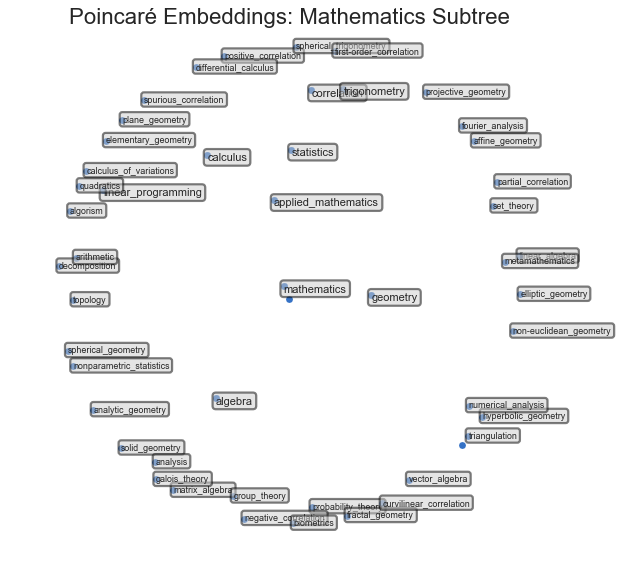

In [ ]:
plot_embedding(emb_dict, plot_frac=1, label_frac=0.001,
               title='Poincaré Embeddings: Mathematics Subtree', save_fig=True)

## gensim

In [ ]:
from gensim.models.poincare import PoincareModel, PoincareKeyedVectors, PoincareRelations
file_path = "wordnet_mammal_hypernyms.tsv"
relations = PoincareRelations(file_path=file_path, delimiter='\t')
model = PoincareModel(train_data=relations, size=2)
model.train(epochs=10, print_every=500)

In [ ]:
model.kv.save_word2vec_format('test_vectors')
PoincareKeyedVectors.load_word2vec_format('test_vectors')

In [ ]:
model.kv.descendants('mammal.n.01')
model.kv.ancestors('dog.n.01')

['round-tailed_muskrat.n.01',
 'mole_rat.n.02',
 'sand_rat.n.01',
 'chinchilla.n.03',
 'coypu.n.01']

['corgi.n.01',
 'puppy.n.01',
 'miniature_poodle.n.01',
 'keeshond.n.01',
 'pug.n.01',
 'brown_hyena.n.01',
 'red_fox.n.02',
 'grey_fox.n.01',
 'striped_hyena.n.01',
 'jackal.n.01',
 'hyena.n.01',
 'aardwolf.n.01',
 'carnivore.n.01',
 'bassarisk.n.01',
 'kinkajou.n.01',
 'coati.n.01',
 'lesser_panda.n.01',
 'procyonid.n.01',
 'giant_panda.n.01',
 'tusker.n.01',
 'armadillo.n.01',
 'ground_sloth.n.01',
 'two-toed_sloth.n.01',
 'rock_hyrax.n.01',
 'asiatic_shrew_mole.n.01',
 'pangolin.n.01',
 'hyrax.n.01']

In [ ]:
from IPython.core.display import HTML

def css_styling():
    styles = open("custom_style.css", "r").read()
    return HTML(styles)
css_styling()